<a href="https://colab.research.google.com/github/Jane23415/Data_Science_Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Popular Filming Locations in NYC** 
By: Jane Feng

![alt text](https://www.prospecthill.com/wp-content/uploads/2016/09/film-2.jpg)
Image Credits https://www.prospecthill.com/blog/navigating-2016-virginia-film-festival 

### **Overview of the project:**


The objective of the project is to find the which zip codes in NYC are the most popular for filming/shooting things. My goal is to determine which zip codes around NYC are used the most by counting the number of permits for each zip code. Because NYC is mostly known for its locations in Manhattan, I predict that most of the top filming zip codes will be located in Manhattan. 

### **Data**

The data used for this project, Film Permits, came from NYC Open Data (https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p). The dataset contained filming related permits that were obtained between Jan 1st 2012 - Aug 9th 2021, the zip codes the filming took place and they type of production the permit were used for. 

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

csv_file = drive.CreateFile({'id':"11pnfuhO9lDEoLNmZvjf-Sb0U6bhmzjwR"}) 
csv_file.GetContentFile("Film_Permits.csv")

In [ ]:
pip install pandasql

In [ ]:
# importing libraries
import pandas as pd 
import pandasql as psql
import matplotlib.pyplot as plt

### **Techniques**

Since the dataset contained all permits that are related to filming, I had to clean the data by using SQL to remove the rows that were not shooting permits. From there I noticed that some rows in the Zip Code(s) column had multiple values, so I created a list to hold all the zip codes and converted the list into a dataframe, zip_df, to be used in other parts of the project. Using the zip_df, I was able to create my bar graph visualizations by counting the number of times each zip code appeared in the list, since each occurrence of the zip code represented a permit in the zip code. For all the bar graph visualizations, I extracted the zip codes and graphed the top 25 zip codes with the most permits. Lastly, I also created a pie chart to show the breakdown of what type of filming event the permits were used for. 

In [ ]:
# Reading csv file
film_file = pd.read_csv('Film_Permits.csv')

In [ ]:
# Filter rows where EventType = Shooting Permit
event_filter = 'SELECT * FROM film_file WHERE EventType = "Shooting Permit"'
event = psql.sqldf(event_filter)
event

In [ ]:
# extracting the zip codes from the df
zipcode_list = []
for i in event['ZipCode(s)']:
    temp = str(i).split(", ")
    for j in temp:
        zipcode_list.append(j)

# convert the extracted zip codes into a df 
zip_df = pd.DataFrame(zipcode_list, columns = ['Zip Codes'])
zip_df

In [ ]:
# Find the top 25 zip codes used for filming locations in NYC 
print("Zip Code", "Total")
print(zip_df['Zip Codes'].value_counts()[:25])

In [ ]:
# Graph the top 25 zip codes in NYC 
zip_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Most Popular Filming Zip Codes Around NYC')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# Extract zip codes located in Manhattan
manhattan_list = []
for i in zip_df['Zip Codes']:
  if i.isdigit() == True:
    if (int(i) > 10000) & (int(i) < 10283):
      manhattan_list.append(i)

# Convert extracted zip codes into a dataframe
manhattan_df = pd.DataFrame(manhattan_list, columns = ['Zip Codes'])

In [ ]:
# Top 25 zip codes in Manhattan
print("Zip Code", "Total")
print(manhattan_df['Zip Codes'].value_counts()[:25])

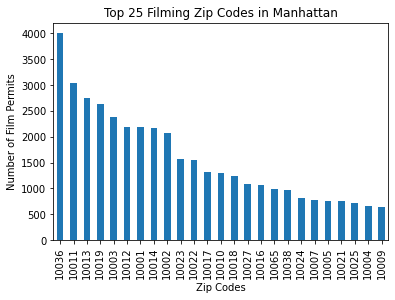

In [ ]:
# Graph the top 25 zip codes in Manhattan 
manhattan_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Filming Zip Codes in Manhattan')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# Extract zip codes located in Brooklyn
brooklyn_list = []
for i in zip_df['Zip Codes']:
  if i.isdigit() == True:
    if (int(i) > 11200) & (int(i) < 11257):
      brooklyn_list.append(i)

# Convert extracted zip codes into a dataframe
brooklyn_df = pd.DataFrame(brooklyn_list, columns = ['Zip Codes'])

In [ ]:
# Top 25 zip codes in Brooklyn
print("Zip Code", "Total")
print(brooklyn_df['Zip Codes'].value_counts()[:25])

In [ ]:
# Graph the top 25 zip codes in Brooklyn 
brooklyn_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Filming Zip Codes in Brooklyn')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# Extract zip codes located in Queens
queens_list = []
for i in zip_df['Zip Codes']:
  if i.isdigit() == True:
    if ((int(i) > 11000) & (int(i) < 11110)) | ((int(i) > 11350) & (int(i) < 11386)) | ((int(i) > 11410) & (int(i) < 11437)) | ((int(i) > 11690) & (int(i) < 11698)):
      queens_list.append(i)

# Convert extracted zip codes into a dataframe
queens_df = pd.DataFrame(queens_list, columns = ['Zip Codes'])

In [ ]:
# Top 25 zip codes in Queens
print("Zip Code", "Total")
print(queens_df['Zip Codes'].value_counts()[:25])

Zip Code Total
11101    6413
11106    1779
11385    1605
11105     462
11378     455
11415     326
11102     280
11375     235
11104     231
11377     225
11357     188
11363     187
11103     178
11418     159
11109     158
11379     139
11435     131
11374     128
11367     125
11421     118
11361     117
11373     114
11694     107
11432     102
11354      93
Name: Zip Codes, dtype: int64


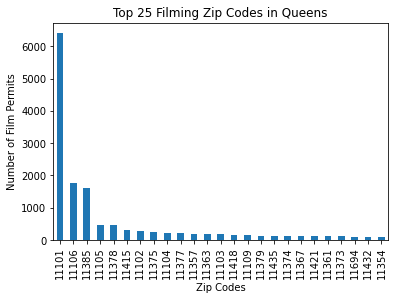

In [ ]:
# Graph the top 25 zip codes in Queens
queens_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Filming Zip Codes in Queens')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# Extract zip codes located in Bronx
bronx_list = []
for i in zip_df['Zip Codes']:
  if i.isdigit() == True:
    if (int(i) > 10450) & (int(i) < 10476):
      bronx_list.append(i)

# Convert extracted zip codes into a dataframe
bronx_df = pd.DataFrame(bronx_list, columns = ['Zip Codes'])

In [ ]:
# Top 25 zip codes in Bronx
print("Zip Code", "Total")
print(bronx_df['Zip Codes'].value_counts()[:25])

Zip Code Total
10454    691
10451    251
10474    228
10452    173
10458    171
10471    148
10457    148
10468    132
10473    126
10453    101
10456     94
10463     88
10464     61
10455     58
10466     49
10470     48
10461     46
10467     45
10465     40
10459     38
10462     37
10472     26
10469     25
10460     25
10475     20
Name: Zip Codes, dtype: int64


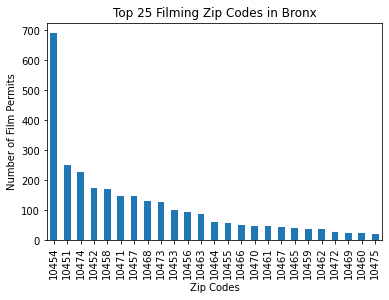

In [ ]:
# Graph the top 25 zip codes in Bronx 
bronx_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Top 25 Filming Zip Codes in Bronx')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# Since Staten Island has less than 25 zip codes, I decided to show and graph the total of permits in all the zip codes
# Extract zip codes located in Staten Island
staten_list = []
for i in zip_df['Zip Codes']:
  if i.isdigit() == True:
    if (int(i) > 10300) & (int(i) < 10315):
      staten_list.append(i)

# Convert extracted zip codes into a dataframe
staten_df = pd.DataFrame(staten_list, columns = ['Zip Codes'])

In [ ]:
# Filming zip codes in Staten Island
print("Zip Code", "Total")
print(staten_df['Zip Codes'].value_counts()[:25])

Zip Code Total
10301    245
10304    179
10309    135
10310    134
10302     91
10314     85
10305     82
10306     81
10303     60
10307     44
10308     28
10312     27
Name: Zip Codes, dtype: int64


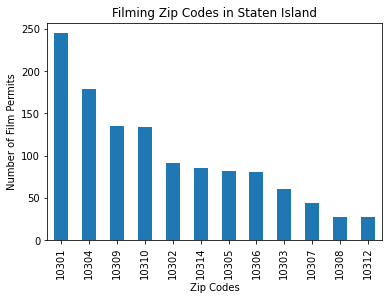

In [ ]:
# Graph the filming zip codes in Staten Island 
staten_df['Zip Codes'].value_counts()[:25].plot(kind = 'bar')
plt.title('Filming Zip Codes in Staten Island')
plt.xlabel('Zip Codes')
plt.xticks(rotation = 90)
plt.ylabel('Number of Film Permits')
plt.show()

In [ ]:
# breakdown of what category the film permits are used for 
category_count = event['Category'].value_counts()
percentage = []
for i in category_count:
  percentage.append(round(i/sum(category_count)*100, 1))

print("Category", "\t  ", "Total Permits")
print(category_count)
print("Percentage break down: ", percentage)

Category 	   Total Permits
Television             38156
Film                   10671
Commercial              5555
Still Photography       4177
WEB                     2574
Theater                  669
Documentary              307
Student                  291
Music Video              239
Red Carpet/Premiere        1
Name: Category, dtype: int64
Percentage break down:  [60.9, 17.0, 8.9, 6.7, 4.1, 1.1, 0.5, 0.5, 0.4, 0.0]


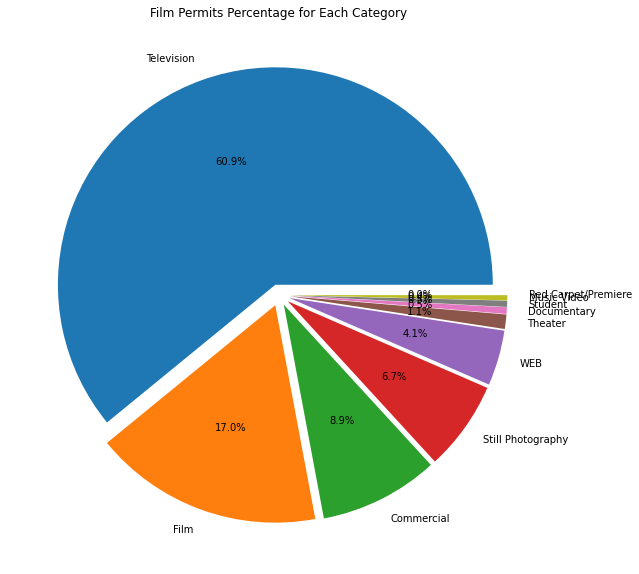

In [ ]:
# Create pie chart to see what the film permits are used for
category_count = event['Category'].value_counts()
category_count.plot.pie(explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], autopct='%1.1f%%', figsize=(10,10))
plt.title('Film Permits Percentage for Each Category')
plt.ylabel('')
plt.show()

### **Resources**


*  Dataset: https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p 
*  Loading Data Onto Colab: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92 
*  Zip Codes for Each Borough: https://www.nycbynatives.com/nyc_info/new_york_city_zip_codes.php  
*  Bar Graph: https://mode.com/python-tutorial/counting-and-plotting-in-python/ 
*  Pie Chart: https://www.sisense.com/blog/data-visualizations-in-python-and-r/ 